# Data Cleaning – Telco Customer Churn (Kaggle, CC0 License)
This notebook performs Data Cleaning on the **Telco Customer Churn** dataset.

**Objective:**  
To clean a real-world customer churn dataset to discover key insights about
customer retention.

**Dataset Used:**  
`WA_Fn-UseC_-Telco-Customer-Churn.csv` (Telco Customer Churn (Kaggle, CC0 License)


## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Load Dataset


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Dataset Overview
Let's examine the basic structure and information of our dataset.


In [3]:
df.head()
#df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- `df.head()` gives top rows to examine basic data.  



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- `df.info()` helps identify data types and missing values.  


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- `df.describe()` gives summary statistics for numerical columns.  


## Missing and Duplicate Values


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

- Found that there are no missing values.
- Examined that there are no duplicate values.
- If any missing / duplicate values are found, we can visualize or decide how to handle them.


## Renaming columns (remove spaces, unify casing)

In [8]:
df = df.rename({'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'}, axis='columns')
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handle missing values in 'TotalCharges'.

In [9]:
df['TotalCharges'].isnull().sum()

0

There are no NaN values

In [10]:
df['TotalCharges'].value_counts()


TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

So there are blank values. Stripping the column.

In [11]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [12]:
df['TotalCharges']=df['TotalCharges'].str.strip().replace('','0')



In [13]:
df['TotalCharges'].value_counts()

TotalCharges
0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

## Convert 'TotalCharges' to numeric type.

In [14]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df['TotalCharges'].value_counts()

TotalCharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

## Standardize categorical variables ('Yes'/'No', 'Male'/'Female').

In [17]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Reviewing Gender Column**

In [19]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

- value_counts() function helps for indentifying any incorrect values
- Found no issue in Gender Column

*Let's create a pie chart to review the Male/Female customers

<Axes: title={'center': 'Male/Female Customers'}, ylabel='count'>

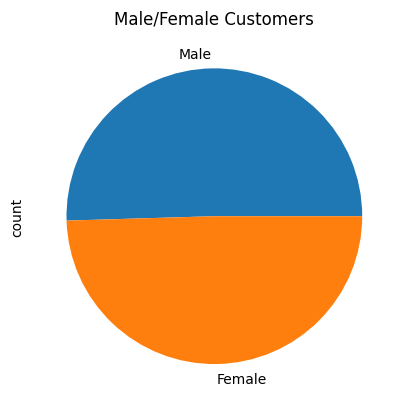

In [20]:
df['Gender'].value_counts().plot(kind='pie', title='Male/Female Customers')

- There are approximatly equal number of male and female customers.

**Reviewing SeniorCitizen Column**

In [21]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

- In SeniorCitizen column 0 and 1 have been used in place of No and Yes sequentilly. There is a need to standardize this column 

In [22]:
# Source - https://stackoverflow.com/a
# Posted by gold_cy
# Retrieved 2025-11-10, License - CC BY-SA 3.0

df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


- Used map function to change the values accordingly.

In [23]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

- Values updated correctly.

*Let's create a pie chart to review the count of Sr. Citizen customers

<Axes: title={'center': 'Sr. Citizen Customers'}, ylabel='count'>

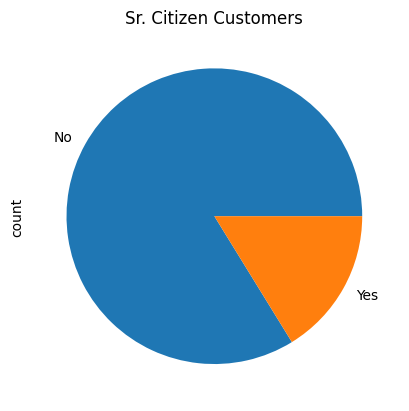

In [54]:
df['SeniorCitizen'].value_counts().plot(kind='pie', title='Sr. Citizen Customers')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Note: The data type for SeniorCitizen column has also been changed

In [26]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Reviewing MultipleLines Column**

In [28]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

- In this column values 'No phone service' should be changed to 'No.

In [29]:
# Replacing 'No phone service' to 'No.
df['MultipleLines']=df['MultipleLines'].str.replace('No phone service','No')
df['MultipleLines'].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

- Used replace() method
- Verfied by value_counts output that No values have increased accordingly.

**Reviewing InternetService Column**

In [30]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

- Found no issue

**Reviewing OnlineSecurity Column**

In [31]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

- Need to change 'No internet service' values to 'No'

In [32]:
df['OnlineSecurity']=df['OnlineSecurity'].str.replace('No internet service','No')
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

**Reviewing OnlineBackup Column**

In [33]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

- Need to change 'No internet service' values to 'No'

In [34]:
df['OnlineBackup']=df['OnlineBackup'].str.replace('No internet service','No')
df['OnlineBackup'].value_counts()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

**Reviewing DeviceProtection Column**

In [35]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

- Need to change 'No internet service' values to 'No'

In [36]:
df['DeviceProtection']=df['DeviceProtection'].str.replace('No internet service','No')
df['DeviceProtection'].value_counts()

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

**Reviewing TechSupport Column**

In [37]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

- Need to change 'No internet service' values to 'No'

In [38]:
df['TechSupport']=df['TechSupport'].str.replace('No internet service','No')
df['TechSupport'].value_counts()

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

**Reviewing StreamingTV Column**

In [39]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

- Need to change 'No internet service' values to 'No'

In [40]:
df['StreamingTV']=df['StreamingTV'].str.replace('No internet service','No')
df['StreamingTV'].value_counts()

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

**Reviewing StreamingMovies Column**

In [41]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

- Need to change 'No internet service' values to 'No'

In [42]:
df['StreamingMovies']=df['StreamingMovies'].str.replace('No internet service','No')
df['StreamingMovies'].value_counts()

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

**Reviewing Contract Column**

In [43]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

- No issue found

**Reviewing PaperlessBilling Column**

In [44]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

- No issue found

**Reviewing PaymentMethod Column**

In [45]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

- No issue found

**Reviewing MonthlyCharges Column**

In [46]:
df['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

- No issue found

**Reviewing TotalCharges Column**

In [47]:
df['TotalCharges'].value_counts()

TotalCharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

- No issue found

**Reviewing Churn Column**

In [48]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- No issue found

## Creating derived column: TenureGroup (e.g., '0–12 months', '13–24', etc.).

In [49]:
#Checking maximum value in Tenure column for defining Tenure Group
df.Tenure.max()


72

- Used max() function for getting maximum value in Tenure column for defining Tenure Group

In [50]:
# Creating derived column 'TenureGroup'
df['TenureGroup']=pd.cut(df.Tenure, bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months'])

In [51]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 months
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 months
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months


In [52]:
df.to_csv('/kaggle/working/cleaned_telco_customer_churn.csv', index=False)

- Cleaned and analyzed dataset saved for further process.
